In [1]:
!pip install --upgrade openai requests Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_api_key"

In [14]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO

def generate_image(prompt):
    # Call the DALL-E API to generate an image based on the prompt
    client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
    response = client.images.generate(
        model="dall-e-2",
        prompt="An illustration of Raju, a small-scale farmer, standing worried in his dry, barren field under a hot sun, depicting the struggles with drought.",
        size="256x256",
        quality="standard",
        n=1
    )
    # Extract the URL of the generated image from the response
    image_url = response.data[0].url
    
    # Fetch the image from the URL
    image_response = requests.get(image_url)
    
    # Open and display the image using Pillow
    image = Image.open(BytesIO(image_response.content))
    image.show()
    
    return image_url  # Return the URL for reference

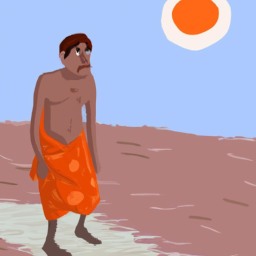

Generated Image URL: https://oaidalleapiprodscus.blob.core.windows.net/private/org-QIqSFCGHhN9VguCHO4WOMLDZ/user-F7D7Lj3B4PXuCUkJvChN4KZK/img-jOmhbKVuxXPyMYusS9PnYM7r.png?st=2024-11-09T04%3A33%3A00Z&se=2024-11-09T06%3A33%3A00Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-11-08T19%3A03%3A30Z&ske=2024-11-09T19%3A03%3A30Z&sks=b&skv=2024-08-04&sig=5DYmRPB%2BKrRhCvb2q9upfqDL2w/gDT/Qv7FDdOy0nKE%3D


In [15]:
# Example prompt for generating an image
prompt = "A futuristic cityscape at sunset"
image_url = generate_image(prompt)
print(f"Generated Image URL: {image_url}")